# Final Project - 100795059

In [1]:
import numpy as np
import matplotlib.pyplot as pl

import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.datasets as datasets

from tensorflow.keras.datasets import fashion_mnist

import tensorflow_datasets as tfds

# Fashion Mnist Dataset

Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

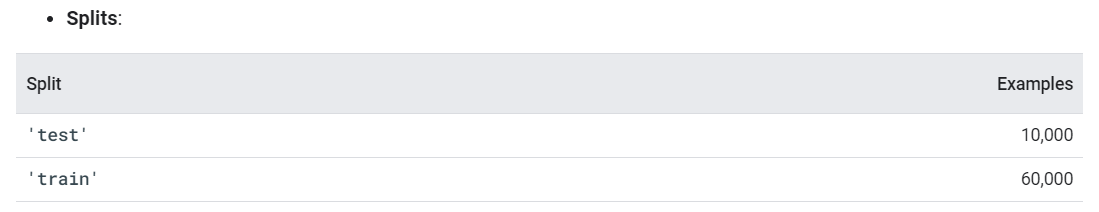

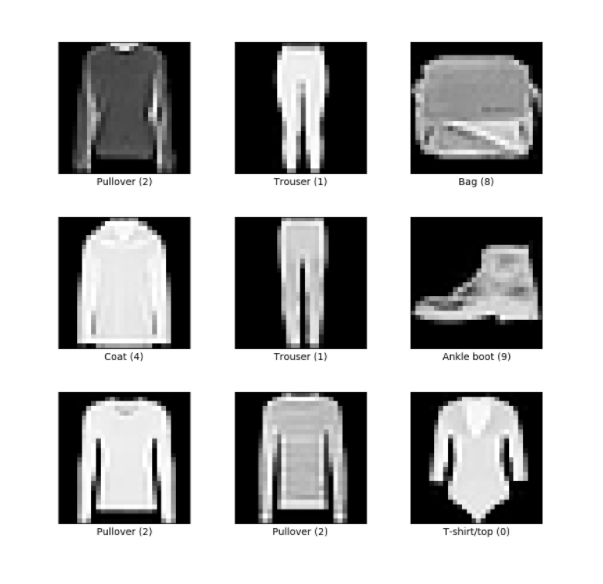

# Loading the Fashion Mnist Dataset

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

4423680/4422102 [==============================] - 0s 0us/step


# Examples of the Training Data

x_train is the image and y_train is the label associated to that image.

9


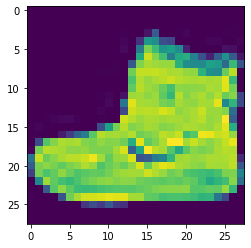

In [3]:
x = x_train[0]
y = y_train[0]

pl.imshow(x);
print(y)

9


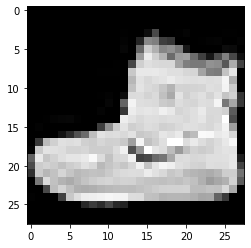

In [4]:
x = x_train[0]
y = y_train[0]

pl.imshow(x,cmap='gray');
print(y)

8


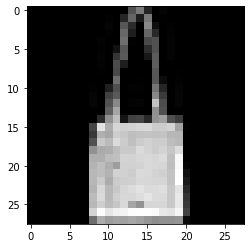

In [7]:
x = x_train[200]
y = y_train[200]

pl.imshow(x,cmap='gray');
print(y)

# Autoencoders

Autoencoders are an unsupervised learning technique in which we leverage neural networks for the task of representation learning. Specifically, we'll design a neural network architecture such that we impose a bottleneck in the network which forces a compressed knowledge representation of the original input. If the input features were each independent of one another, this compression and subsequent reconstruction would be a very difficult task. However, if some sort of structure exists in the data (ie. correlations between input features), this structure can be learned and consequently leveraged when forcing the input through the network's bottleneck.

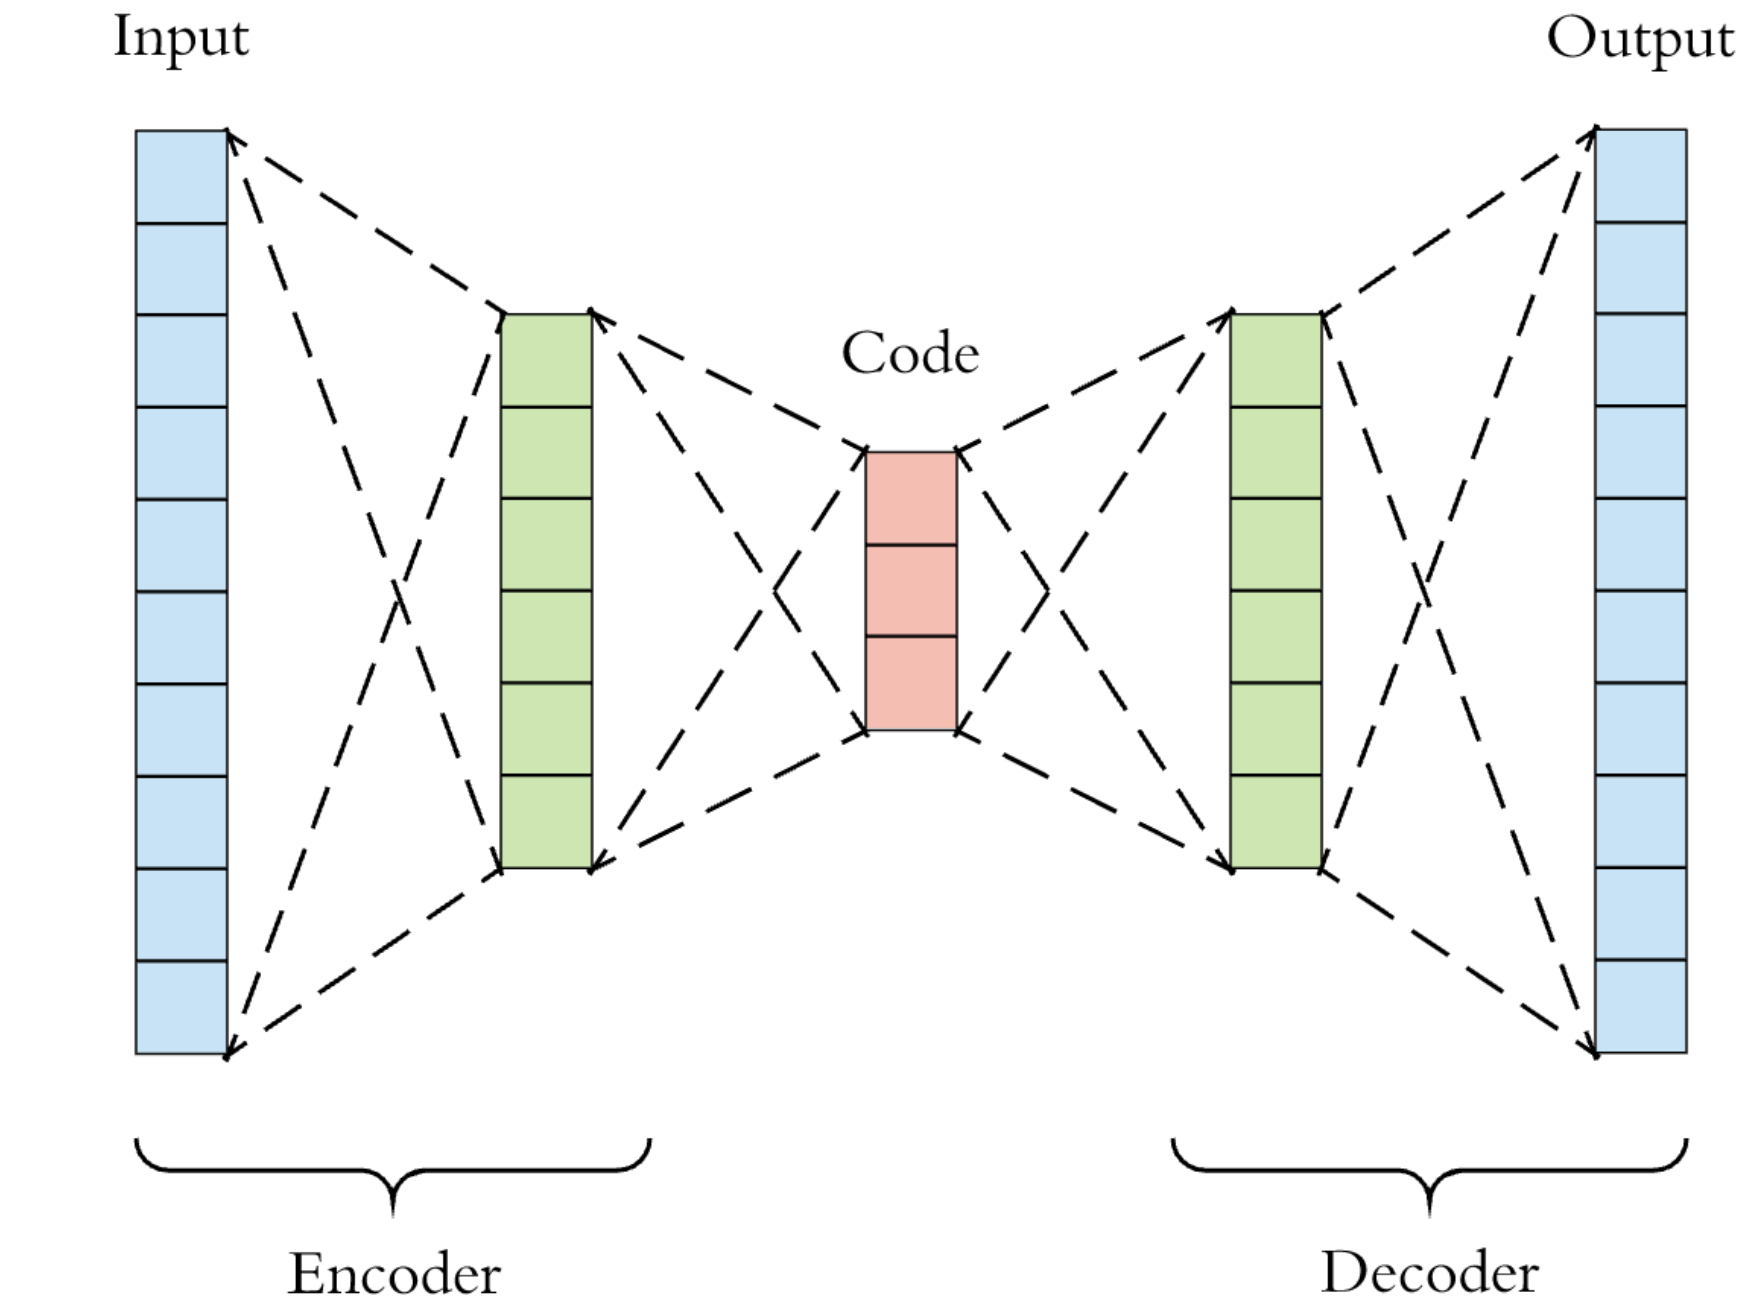

# Simple Autoencoder

In [8]:
#
# Build the encoder and decoder layers
#
encoder_layer = layers.Dense(32,name='encoder_dense')
decoder_layer = layers.Dense(28*28*1,name='decoder_dense')

In [9]:
#
# Build the end-to-end autoencoder model
#
autoencoder = keras.Sequential([
    layers.Input(shape=(28*28,)),
    encoder_layer,
    decoder_layer,
],name='simple_autoencoder_model')
autoencoder.summary()

Model: "simple_autoencoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_dense (Dense)        (None, 32)                25120     
_________________________________________________________________
decoder_dense (Dense)        (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [10]:
#
# Train the encoder and decoder together, so that they are "lossless"
#
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(),metrics=['acc'])

In [11]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [12]:
autoencoder.fit(x_train, x_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 0.8413 - acc: 0.0028
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.4686 - acc: 0.0080
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3956 - acc: 0.0079
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3780 - acc: 0.0089
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3421 - acc: 0.0125
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3333 - acc: 0.0136
Epoch 7/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3388 - acc: 0.0106
Epoch 8/10
469/469 [==============================] - 3s 7ms/step - loss: 0.3655 - acc: 0.0085
Epoch 9/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3432 - acc: 0.0132
Epoch 10/10
469/469 [==============================] - 3s 6ms/step - loss: 0.3432 - acc: 0.0131


In [13]:
from google.colab import files
src = list(files.upload().values())[0]
open('my.py','wb').write(src)
import my

Saving my.py to my.py


In [14]:
from importlib import reload
reload(my)

<module 'my' from '/content/my.py'>

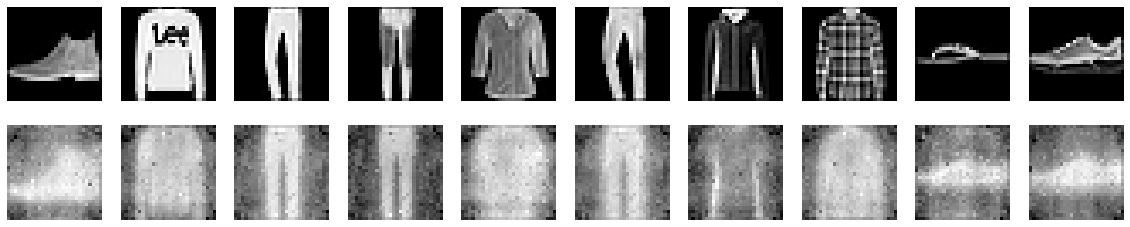

In [15]:
my.plot_reconstruction(autoencoder,x_test,10)

As you can see this autoencoder does not work good enough becuase the encoder and decoder layers are only two simple dense layers. Now let's try buliding another dense autoencoder.

# Dense Autoencoder

In [16]:
#
# Build the encoder and decoder layers
#
encoder_layers = [
    layers.Flatten(name='flatten'),
    layers.Dense(64, activation='relu',name='encoder_dense')
]

decoder_layers = [
    layers.Dense(28*28, activation='sigmoid',name='decoder_dense')
]

In [17]:
#
# Build the autoencoder
#

autoencoder = keras.Sequential([
    layers.Input(shape=(28*28,))
] + encoder_layers + decoder_layers , name='dense_autoencoder')

In [18]:
autoencoder.summary()

Model: "dense_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
encoder_dense (Dense)        (None, 64)                50240     
_________________________________________________________________
decoder_dense (Dense)        (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [19]:
#
# Train the encoder and decoder together, so that they are "lossless"
#
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(),metrics=['acc'])

In [20]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 3s 11ms/step - loss: 0.4726 - acc: 0.0043
Epoch 2/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3193 - acc: 0.0127
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.3008 - acc: 0.0150
Epoch 4/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2903 - acc: 0.0204
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2850 - acc: 0.0244
Epoch 6/10
235/235 [==============================] - 3s 12ms/step - loss: 0.2815 - acc: 0.0264
Epoch 7/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2794 - acc: 0.0279
Epoch 8/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2768 - acc: 0.0313
Epoch 9/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2756 - acc: 0.0304
Epoch 10/10
235/235 [==============================] - 3s 11ms/step - loss: 0.2747 - acc: 0.0316


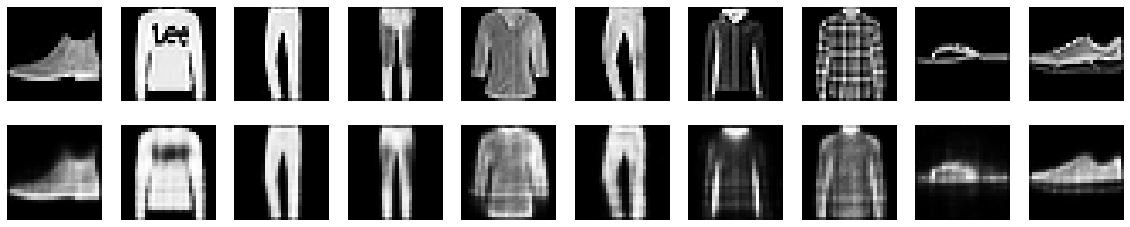

In [21]:
my.plot_reconstruction(autoencoder,x_test,10)

This autoencoder is working better than the first one because it has more dense layers in it's both encoder and decoder. Now let's build another autoencoder which has even more dense layers in both it's encoder and decoder.

# Deep Dense Autoencoder

In [22]:
#
# Build the encoder and decoder layers
#
encoder_layers = [
    layers.Dense(128, activation='relu',name='encoder_dense_1'),
    layers.Dense(64, activation='relu',name='encoder_dense_2'),
    layers.Dense(32, activation='relu',name='encoder_dense_3')
]

decoder_layers = [
    layers.Dense(64, activation='relu',name='decoder_dense_1'),
    layers.Dense(128, activation='relu',name='decoder_dense_2'),
    layers.Dense(28*28, activation='relu',name='decoder_dense_3')
]

In [23]:
#
# Build the autoencoder
#

autoencoder = keras.Sequential([
    layers.Input(shape=(28*28,))
] + encoder_layers + decoder_layers,name='deep_dense_autoencoder')

In [24]:
autoencoder.summary()

Model: "deep_dense_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_dense_1 (Dense)      (None, 128)               100480    
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 64)                8256      
_________________________________________________________________
encoder_dense_3 (Dense)      (None, 32)                2080      
_________________________________________________________________
decoder_dense_1 (Dense)      (None, 64)                2112      
_________________________________________________________________
decoder_dense_2 (Dense)      (None, 128)               8320      
_________________________________________________________________
decoder_dense_3 (Dense)      (None, 784)               101136    
Total params: 222,384
Trainable params: 222,384
Non-trainable params: 0
______________________________________

In [25]:
#
# Train the encoder and decoder together, so that they are "lossless"
#
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(),metrics=['acc'])

In [26]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 4s 14ms/step - loss: 1.1993 - acc: 0.0031
Epoch 2/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6610 - acc: 0.0049
Epoch 3/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6594 - acc: 0.0052
Epoch 4/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6005 - acc: 0.0053
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.5780 - acc: 0.0084
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.5978 - acc: 0.0059
Epoch 7/10
235/235 [==============================] - 3s 13ms/step - loss: 0.5714 - acc: 0.0104
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.5633 - acc: 0.0112
Epoch 9/10
235/235 [==============================] - 3s 14ms/step - loss: 0.5670 - acc: 0.0108
Epoch 10/10
235/235 [==============================] - 3s 14ms/step - loss: 0.5581 - acc: 0.0122


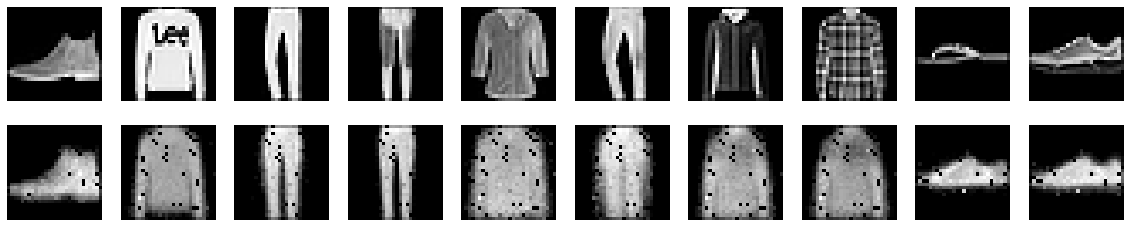

In [27]:
my.plot_reconstruction(autoencoder,x_test,10)

# Deep Conv Autoencoder

Let's try building the encoder and decoder using Conv2D and MaxPooling2D layers.

In [28]:
x_train = x_train.reshape(-1, 28, 28,1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [29]:
#
# Build the encoder layers using 3 layers of Conv2D with MaxPooling2D
#

encoder_layers = [
    layers.Conv2D(32, (3, 3), activation='relu', padding='same',name='encoder_conv2d_1'),
    layers.MaxPooling2D((2,2), padding='same',name='encoder_maxpooling2d_1'),
    layers.Conv2D(16, (3, 3), activation='relu', padding='same',name='encoder_conv2d_2'),
    layers.MaxPooling2D((2,2), padding='same',name='encoder_maxpooling2d_2'),
    layers.Conv2D(8, (3, 3), activation='relu', padding='same',name='encoder_conv2d_3'),
    layers.MaxPooling2D((2,2), padding='same',name='encoder_maxpooling2d_3')
]

In [30]:
#
# Decoder layers uses Conv2D followed by UpSampling2D
#
decoder_layers = [
    layers.Conv2D(8, (3,3), activation='relu', padding='same',name='decoder_conv2d_1'),
    layers.UpSampling2D((2, 2),name='decoder_upsampling2d_1'),
    layers.Conv2D(16, (3,3), activation='relu', padding='same',name='decoder_conv2d_2'),
    layers.UpSampling2D((2, 2),name='decoder_upsampling2d_2'),
    layers.Conv2D(32, (3,3), activation='relu',name='decoder_conv2d_3'),
    layers.UpSampling2D((2, 2),name='decoder_upsampling2d_3'),
    layers.Conv2D(1, (3,3), activation='sigmoid', padding='same',name='decoder_conv2d_4')
]

In [31]:
#
# Build the autoencoder
#
autoencoder = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
] + encoder_layers + decoder_layers,name='deep_conv_autoencoder')

In [32]:
autoencoder.summary()

Model: "deep_conv_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_conv2d_1 (Conv2D)    (None, 28, 28, 32)        320       
_________________________________________________________________
encoder_maxpooling2d_1 (MaxP (None, 14, 14, 32)        0         
_________________________________________________________________
encoder_conv2d_2 (Conv2D)    (None, 14, 14, 16)        4624      
_________________________________________________________________
encoder_maxpooling2d_2 (MaxP (None, 7, 7, 16)          0         
_________________________________________________________________
encoder_conv2d_3 (Conv2D)    (None, 7, 7, 8)           1160      
_________________________________________________________________
encoder_maxpooling2d_3 (MaxP (None, 4, 4, 8)           0         
_________________________________________________________________
decoder_conv2d_1 (Conv2D)    (None, 4, 4, 8) 

In [33]:
#
# Train the encoder and decoder together, so that they are "lossless"
#
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(),metrics=['acc'])

In [34]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 120s 254ms/step - loss: 0.4091 - acc: 0.4932
Epoch 2/10
469/469 [==============================] - 119s 254ms/step - loss: 0.2995 - acc: 0.5054
Epoch 3/10
469/469 [==============================] - 119s 255ms/step - loss: 0.2939 - acc: 0.5049
Epoch 4/10
469/469 [==============================] - 119s 254ms/step - loss: 0.2899 - acc: 0.5063
Epoch 5/10
469/469 [==============================] - 119s 254ms/step - loss: 0.2874 - acc: 0.5068
Epoch 6/10
469/469 [==============================] - 119s 254ms/step - loss: 0.2851 - acc: 0.5079
Epoch 7/10
469/469 [==============================] - 119s 255ms/step - loss: 0.2838 - acc: 0.5080
Epoch 8/10
469/469 [==============================] - 120s 255ms/step - loss: 0.2824 - acc: 0.5081
Epoch 9/10
469/469 [==============================] - 120s 255ms/step - loss: 0.2822 - acc: 0.5072
Epoch 10/10
469/469 [==============================] - 118s 252ms/step - loss: 0.2813 - acc: 0.5067


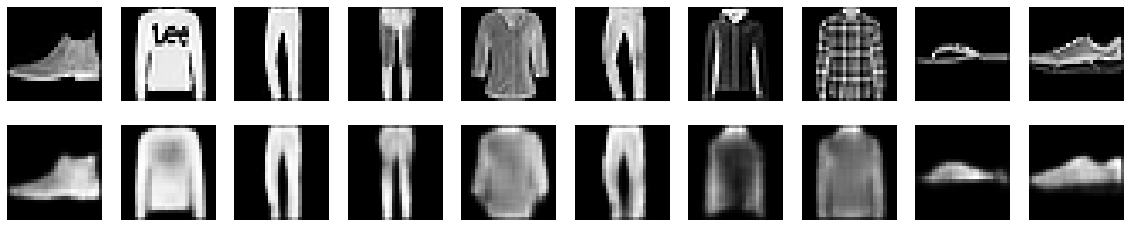

In [35]:
my.plot_reconstruction(autoencoder, x_test, 10)

# Conv Autoencoder

In [36]:
#
# Build the encoder layers using Conv2D layers
#

encoder_layers = [
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)
]

In [37]:
#
# Decoder layers uses Conv2D and Conv2DTranspose
#
decoder_layers = [
    layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
    layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
    layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
]

In [38]:
#
# Build the autoencoder
#
autoencoder = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
] + encoder_layers + decoder_layers,name='conv_autoencoder')

In [39]:
autoencoder.summary()

Model: "conv_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [40]:
#
# Train the encoder and decoder together, so that they are "lossless"
#
autoencoder.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(),metrics=['acc'])

In [41]:
autoencoder.fit(x_train, x_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 53s 111ms/step - loss: 0.4376 - acc: 0.4986
Epoch 2/10
469/469 [==============================] - 52s 111ms/step - loss: 0.2712 - acc: 0.5098
Epoch 3/10
469/469 [==============================] - 52s 111ms/step - loss: 0.2651 - acc: 0.5089
Epoch 4/10
469/469 [==============================] - 52s 111ms/step - loss: 0.2606 - acc: 0.5106
Epoch 5/10
469/469 [==============================] - 52s 112ms/step - loss: 0.2574 - acc: 0.5101
Epoch 6/10
469/469 [==============================] - 52s 112ms/step - loss: 0.2558 - acc: 0.5100
Epoch 7/10
469/469 [==============================] - 52s 112ms/step - loss: 0.2548 - acc: 0.5095
Epoch 8/10
469/469 [==============================] - 53s 112ms/step - loss: 0.2528 - acc: 0.5106
Epoch 9/10
469/469 [==============================] - 53s 112ms/step - loss: 0.2528 - acc: 0.5093
Epoch 10/10
469/469 [==============================] - 53s 112ms/step - loss: 0.2521 - acc: 0.5102


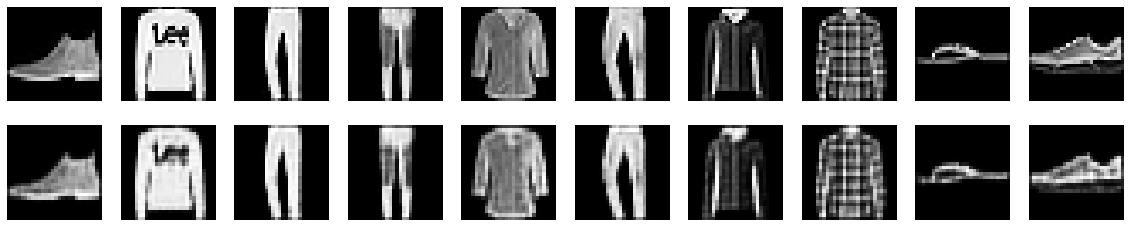

In [42]:
my.plot_reconstruction(autoencoder, x_test, 10)

# Fine Tuning

Here I am trying to add noise to the testing dataset and then see if the Conv Autoencoder model can capture and ignore noises and still work good?

In [43]:
autoencoder.summary()

Model: "conv_autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [44]:
#
# Add noise to x_test
#

noise = np.random.normal(size=x_test.shape) * 0.5
x_test_noisy = np.clip(x_test + noise, 0, 1)

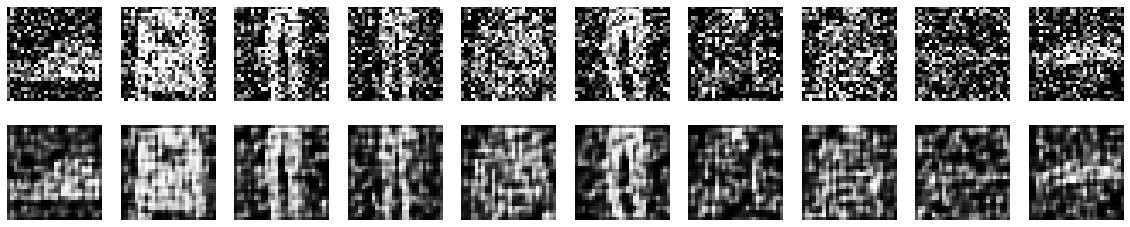

In [45]:
my.plot_reconstruction(autoencoder, x_test_noisy, 10)

As you can see this autoencoder is not working good for nosiy test data. So we have to continue training the network with noisy training data. This is called **"Fine Tuning"**.

In [49]:
#
# Add noise to x_train
#

noise = np.random.normal(size=x_train.shape) * 0.7
x_train_noisy = np.clip(x_train + noise, 0, 1)

In [50]:
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 51s 109ms/step - loss: 0.3354 - acc: 0.5034
Epoch 2/10
469/469 [==============================] - 51s 110ms/step - loss: 0.3344 - acc: 0.5035
Epoch 3/10
469/469 [==============================] - 51s 110ms/step - loss: 0.3340 - acc: 0.5035
Epoch 4/10
469/469 [==============================] - 51s 109ms/step - loss: 0.3338 - acc: 0.5035
Epoch 5/10
469/469 [==============================] - 51s 110ms/step - loss: 0.3335 - acc: 0.5035
Epoch 6/10
469/469 [==============================] - 51s 109ms/step - loss: 0.3333 - acc: 0.5035
Epoch 7/10
469/469 [==============================] - 51s 109ms/step - loss: 0.3331 - acc: 0.5036
Epoch 8/10
469/469 [==============================] - 51s 109ms/step - loss: 0.3330 - acc: 0.5036
Epoch 9/10
469/469 [==============================] - 51s 109ms/step - loss: 0.3327 - acc: 0.5036
Epoch 10/10
469/469 [==============================] - 51s 109ms/step - loss: 0.3326 - acc: 0.5036


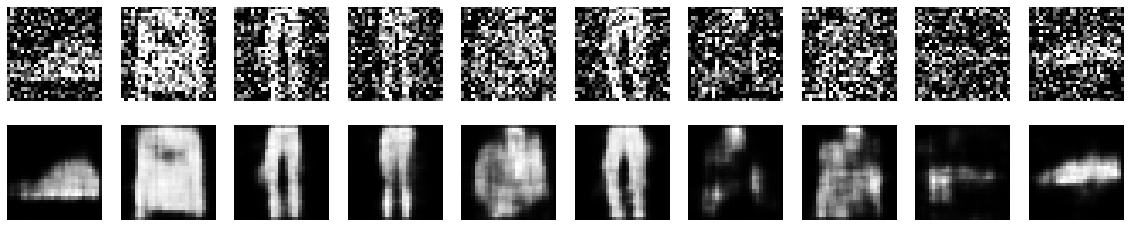

In [51]:
my.plot_reconstruction(autoencoder, x_test_noisy, 10)

# Variational Autoencoder

A variational autoencoder (VAE) provides a probabilistic manner for describing an observation in latent space. Thus, rather than building an encoder which outputs a single value to describe each latent state attribute, we'll formulate our encoder to describe a probability distribution for each latent attribute.

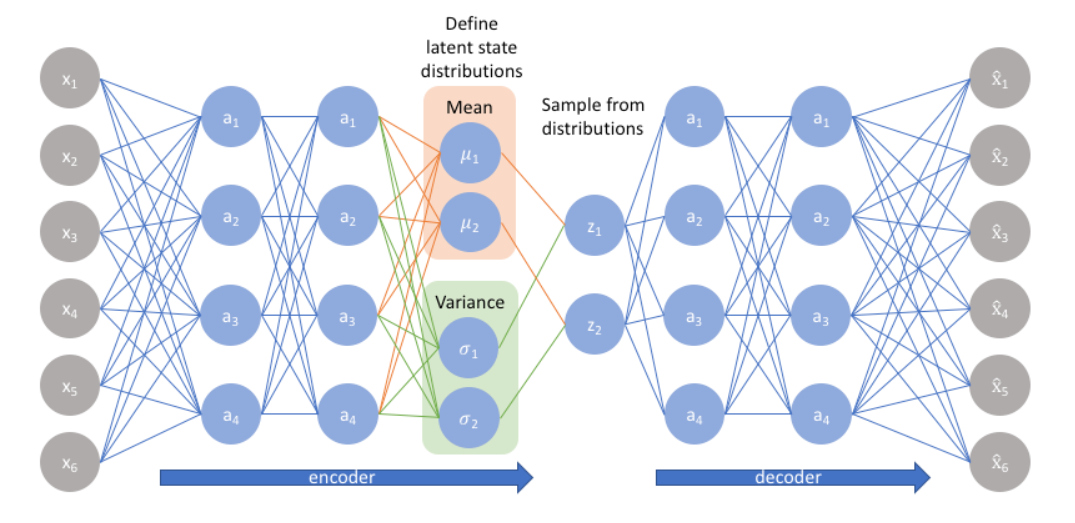

In [52]:
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [53]:
latent_dim = 2

encoder_inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 14, 14, 32)   320         input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 7, 7, 64)     18496       conv2d_3[0][0]                   
__________________________________________________________________________________________________
flatten (Flatten)               (None, 3136)         0           conv2d_4[0][0]                   
____________________________________________________________________________________________

In [54]:
latent_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
x = layers.Reshape((7, 7, 64))(x)
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

In [55]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [56]:
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(x_train, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 78s 163ms/step - loss: 366.2530 - reconstruction_loss: 307.3666 - kl_loss: 5.2178
Epoch 2/10
469/469 [==============================] - 77s 164ms/step - loss: 275.5926 - reconstruction_loss: 268.4883 - kl_loss: 5.7623
Epoch 3/10
469/469 [==============================] - 77s 164ms/step - loss: 271.6035 - reconstruction_loss: 265.3141 - kl_loss: 5.8620
Epoch 4/10
469/469 [==============================] - 77s 164ms/step - loss: 270.1139 - reconstruction_loss: 263.4265 - kl_loss: 5.9181
Epoch 5/10
469/469 [==============================] - 77s 164ms/step - loss: 267.8354 - reconstruction_loss: 262.1296 - kl_loss: 5.9536
Epoch 6/10
469/469 [==============================] - 77s 164ms/step - loss: 267.1991 - reconstruction_loss: 260.9309 - kl_loss: 6.0025
Epoch 7/10
469/469 [==============================] - 77s 163ms/step - loss: 266.6267 - reconstruction_loss: 260.1814 - kl_loss: 6.0341
Epoch 8/10
469/469 [============================